In [4]:
#Importing all the nescerray libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#uploading the file to google coalab
from google.colab import files
uploaded = files.upload()
df=pd.read_csv('BMW sales data (2010-2024) (1).csv')
#Undrestanding the data set
print(df.shape)
print(df.columns)
df.head()


Saving BMW sales data (2010-2024) (1).csv to BMW sales data (2010-2024) (1).csv
(50000, 11)
Index(['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume',
       'Sales_Classification'],
      dtype='object')


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [5]:
#checking for missing values
df.isnull().sum()

,0
Model,0
Year,0
Region,0
Color,0
Fuel_Type,0
Transmission,0
Engine_Size_L,0
Mileage_KM,0
Price_USD,0
Sales_Volume,0


In [6]:
#The gist of the whole data set
df.head(10)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
5,5 Series,2017,Middle East,Silver,Diesel,Manual,1.9,171362,42926,1232,Low
6,i8,2022,Europe,White,Diesel,Manual,1.8,196741,55064,7949,High
7,M5,2014,Asia,Black,Diesel,Automatic,1.6,121156,102778,632,Low
8,X3,2016,South America,White,Diesel,Automatic,1.7,48073,116482,8944,High
9,i8,2019,Europe,White,Electric,Manual,3.0,35700,96257,4411,Low


In [7]:
#To know the size of data
df.shape

(50000, 11)

In [8]:

#--Visualisation 01-Pie plot ----

def plot_pie_chart(df):
  import matplotlib.pyplot as plt

  # Data
  regions = ['Asia', 'Europe', 'North America', 'Middle East', 'Africa', 'South America']
  market_share = [17.0, 16.8, 16.7, 16.7, 16.4, 16.4]

  # Colors
  colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']

  # Plot
  plt.figure(figsize=(8, 8))
  plt.pie(
      market_share,
      labels=regions,
      autopct='%1.1f%%',
      startangle=90,
      colors=colors,
      wedgeprops={'edgecolor': 'white'}
  )

  # Title
  plt.title("Market Share by Region", fontsize=18, fontweight='bold')

  # Display
  plt.show()

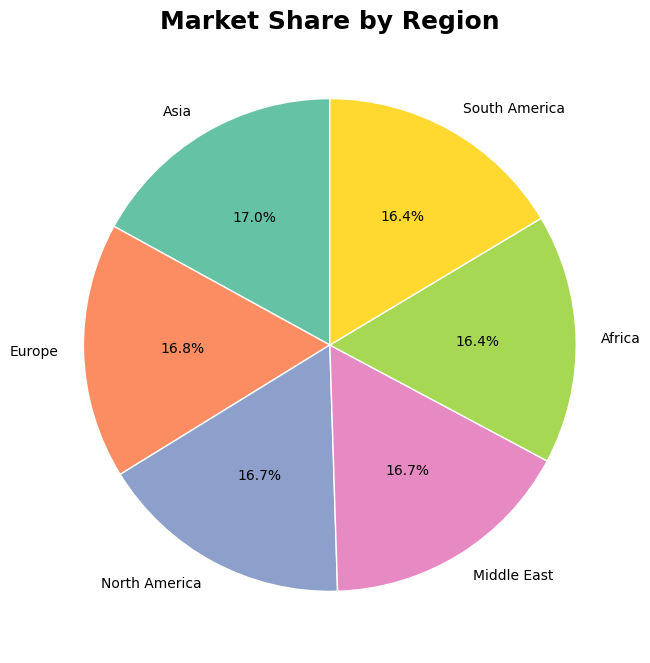

In [9]:
plot_pie_chart(df)

In [15]:
#---Visualisation-02-Line plot-----
#line plot of BMW Sales Over Years (2010-2024)
def plot_line_chart():
  plt.figure(figsize=(12, 6))
  yearly_sales = df.groupby('Year')['Sales_Volume'].sum()

  plt.plot(yearly_sales.index, yearly_sales.values, marker='o', linewidth=2, markersize=8)
  plt.xlabel('Year')
  plt.ylabel('Sales Volume')
  plt.title('BMW Sales Trend Over Years (2010-2024)')
  plt.grid(True, alpha=0.3)

  # Add value annotations
  for year, sales in yearly_sales.items():
      plt.annotate(f'{sales:,}', (year, sales), textcoords="offset points", xytext=(0,10), ha='center')

  plt.tight_layout()
  plt.show()

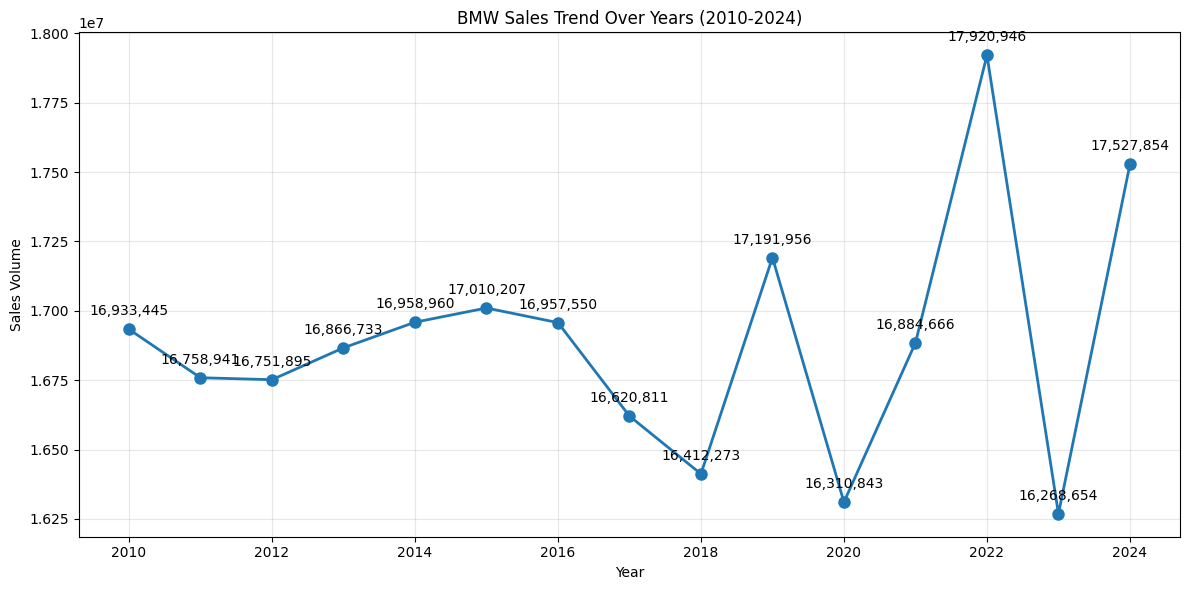

In [16]:
plot_line_chart()

In [17]:
#--Visualisation -03 Heatmap----
# --- 1. Aggregate and Prepare Data ---
# Calculating the AVERAGE Annual Sales Volume for each Fuel_Type and Region
def plot_heatmap():
  avg_sales_by_fuel_region = df.groupby(['Region', 'Fuel_Type'])['Sales_Volume'].mean().reset_index()

  # Reshaping the data for the heatmap (pivot table)
  heatmap_data = avg_sales_by_fuel_region.pivot(
      index='Fuel_Type',
      columns='Region',
      values='Sales_Volume'
  ).fillna(0)

  # --- 2. Creating the Heatmap Plot ---
  plt.figure(figsize=(10, 7))
  sns.heatmap(
      heatmap_data,
      annot=True,     # Show the numerical value in each cell
      fmt='.0f',      # Format as integers
      cmap='PuBuGn',  # Color map for visual appeal
      linewidths=.5,  # Lines between cells
      cbar_kws={'label': 'Average Annual Sales Volume (Units)'}
  )

  # --- 3. Adding Labels ---
  plt.title('Average Annual Sales Volume by Fuel Type and Region (2010-2024)', fontsize=14)
  plt.xlabel('Region')
  plt.ylabel('Fuel Type')
  plt.xticks(rotation=45, ha='right')
  plt.yticks(rotation=0)
  plt.show()

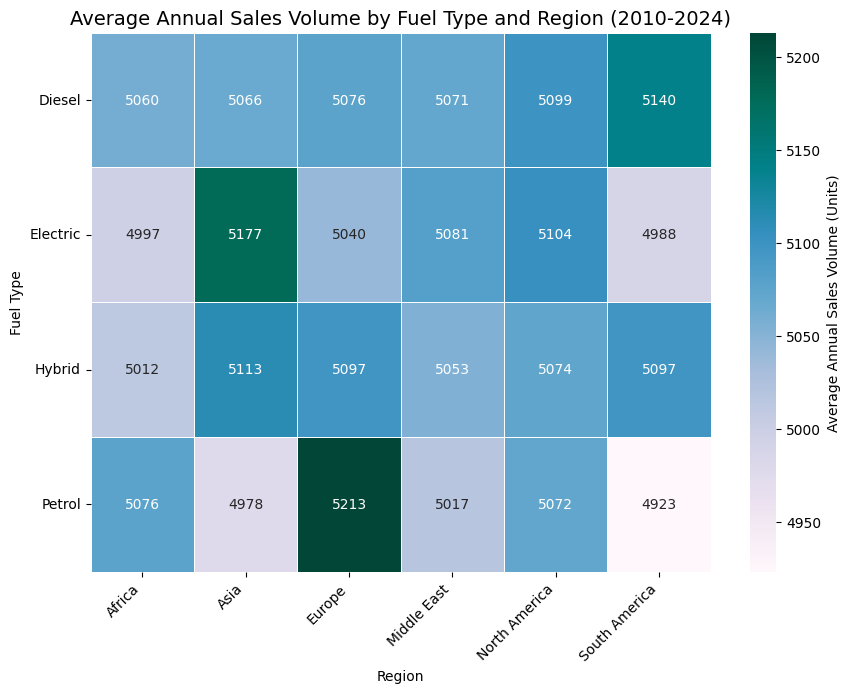

In [18]:
plot_heatmap()